In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
from sklearn import datasets
%matplotlib inline

In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


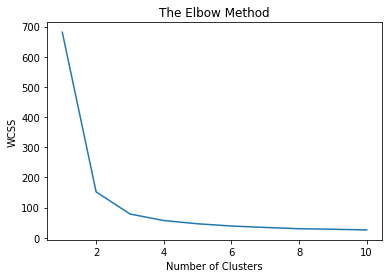

In [3]:
x=df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
list=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    list.append(kmeans.inertia_)

mt.plot(range(1,11),list)
mt.title("The Elbow Method")
mt.xlabel("Number of Clusters")
mt.ylabel("WCSS")
mt.show()

In [4]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

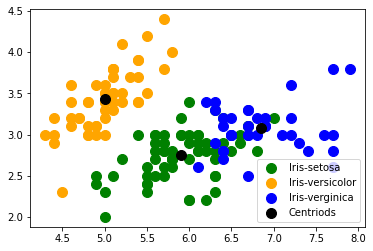

In [5]:
mt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='green', label='Iris-setosa')
mt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='orange', label='Iris-versicolor')
mt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='blue', label='Iris-verginica')

#plotting centriods of clusters
mt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centriods')
mt.legend()